<a href="https://colab.research.google.com/github/yeialgov/MAYC_ML_Revenue_Prediction/blob/patch-1/Feature%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In [1]:
#Mount the Google Drive to Google Colab
#1. get the library
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd '/content/gdrive/My Drive/ReDi_DA_Project/Datasets_Clean/'

/content/gdrive/My Drive/ReDi_DA_Project/Datasets_Clean


In [0]:
# download the libraries
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn cufflinks plotly
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline



In [4]:
clean_df_train = pd.read_csv('Cleaned_train.csv')
clean_df_train.head(5)

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,customDimension.value,year,day,week,month
0,Organic Search,2017-10-16,3162355547410993243,1508198450,1,1508198450,Firefox,Windows,False,desktop,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),1.0,1,1,1,1.0,0,0,0.0,google,organic,water bottle,False,Unknown,True,EMEA,2017,Monday,42,October
1,Referral,2017-10-16,8934116514970143966,1508176307,6,1508176307,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,(not set),2.0,2,0,0,2.0,28,0,0.0,sites.google.com,referral,Unknown,False,Unknown,True,North America,2017,Monday,42,October
2,Direct,2017-10-16,7992466427990357681,1508201613,1,1508201613,Chrome,Android,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercable.net,2.0,2,0,1,1.0,38,0,0.0,(direct),(none),Unknown,True,Unknown,True,North America,2017,Monday,42,October
3,Organic Search,2017-10-16,9075655783635761930,1508169851,1,1508169851,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,2.0,2,0,1,1.0,1,0,0.0,google,organic,(not provided),False,Unknown,True,EMEA,2017,Monday,42,October
4,Organic Search,2017-10-16,6960673291025684308,1508190552,1,1508190552,Chrome,Windows,False,desktop,Americas,Central America,Mexico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prod-infinitum.com.mx,2.0,2,0,1,1.0,52,0,0.0,google,organic,(not provided),False,Unknown,True,Central America,2017,Monday,42,October


## Permutation Importance

To find information about *Permutation Importance* follow the link
https://www.kaggle.com/dansbecker/permutation-importance

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [0]:
#data = pd.read_csv('../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
y = (clean_df_train['totals.transactionRevenue'])
#y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in clean_df_train.columns if clean_df_train[i].dtype in [np.int64]]
X = clean_df_train[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


In [0]:
my_model = RandomForestRegressor(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [13]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.6802 ± 0.3854,totals.transactions
0.6680 ± 0.0433,totals.timeOnSite
0.4711 ± 0.2419,visitNumber
0.1464 ± 0.0621,visitId
0.0777 ± 0.0461,visitStartTime
0.0747 ± 0.0406,totals.pageviews
0.0322 ± 0.0208,week
0.0004 ± 0.0006,year
0 ± 0.0000,totals.bounces
-0.0048 ± 0.0004,totals.newVisits


## Predictive Power Score PPS

In [14]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=079044af06c4f6db7fe8c8f048605608d3e3c8de6efa7b691174cc1926a0812c
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [15]:
import ppscore as pps
pps.score(clean_df_train, "device.browser", "totals.transactionRevenue")

{'baseline_score': 1670292.0,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 3288216.637003961,
 'ppscore': 0,
 'task': 'regression',
 'x': 'device.browser',
 'y': 'totals.transactionRevenue'}

In [18]:
pps.score(clean_df_train, 'totals.transactions','totals.transactionRevenue')

{'baseline_score': 1670292.0,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 1917418.8405829696,
 'ppscore': 0,
 'task': 'regression',
 'x': 'totals.transactions',
 'y': 'totals.transactionRevenue'}

In [0]:
matrix = pps.matrix(clean_df_train)

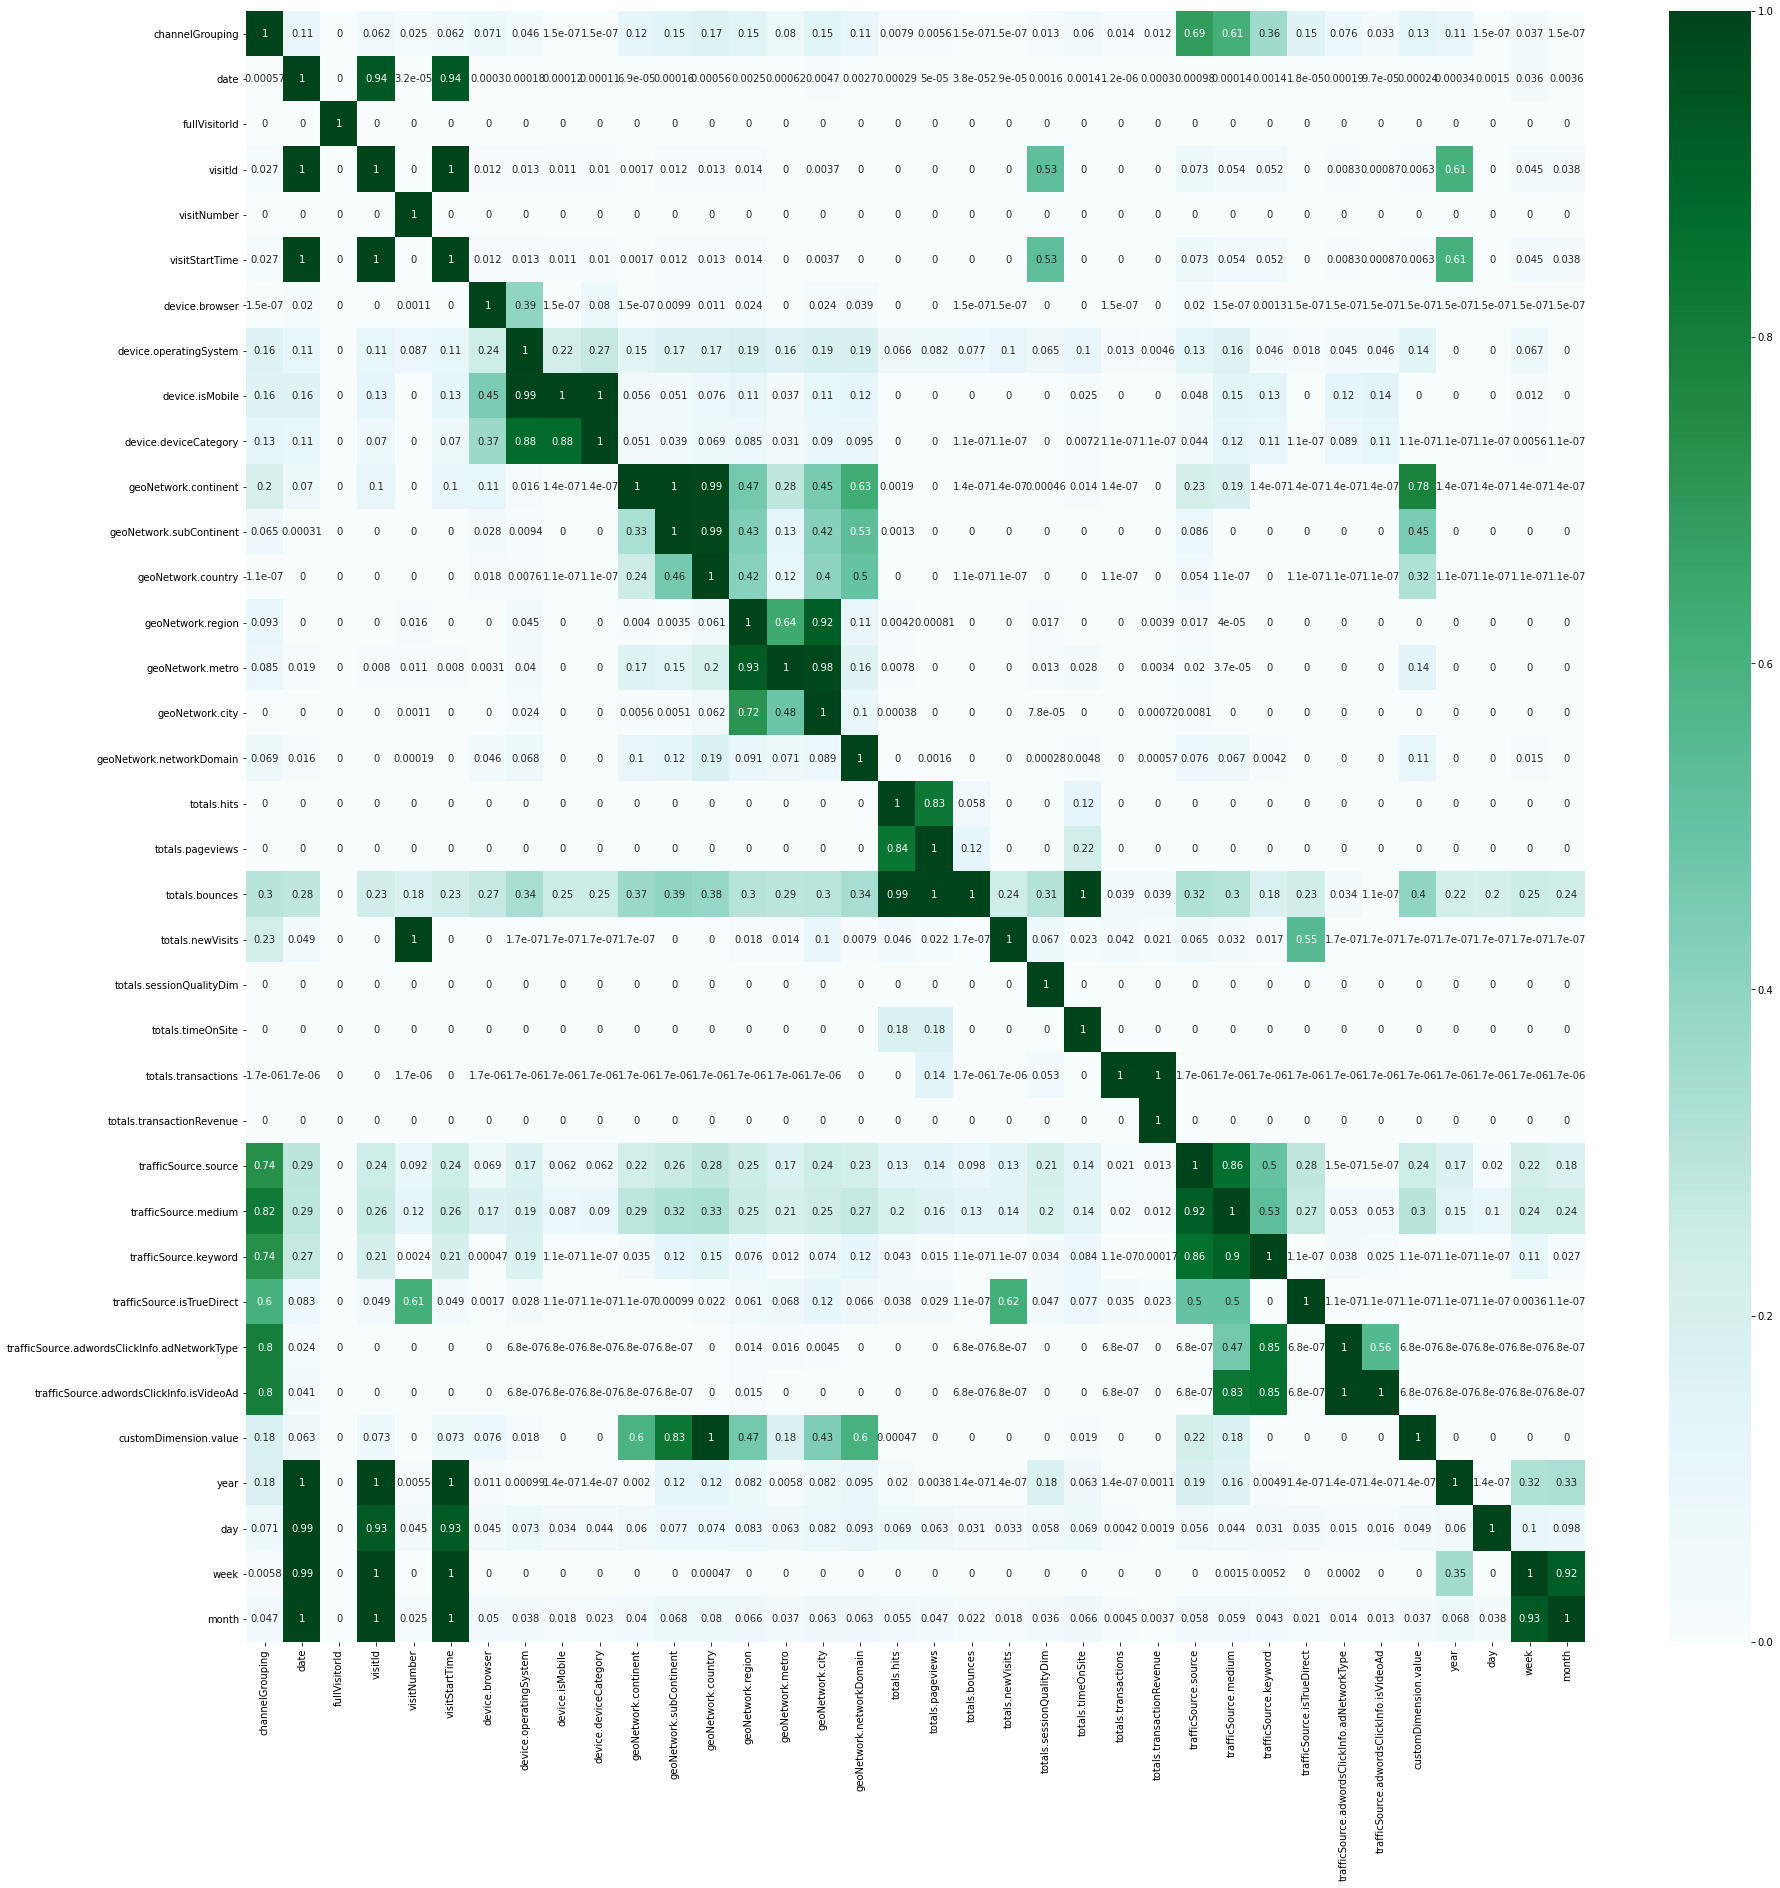

In [22]:
plt.figure(figsize = (30,30))
sns.heatmap(matrix,annot=True, cmap="BuGn")